# Testing rpy2: Princals

We first start with setting up the environment and install the required R and Python packages:

In [ ]:
!R -e "install.packages(c('lavaan','semPlot', 'psych'), repos='https://cran.uni-muenster.de', quiet=TRUE)"
!pip install rpy2==3.5.17


R version 4.4.3 (2025-02-28) -- "Trophy Case"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages(c('lavaan','semPlot', 'psych'), repos='https://cran.uni-muenster.de', quiet=FALSE)
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘arm’, ‘mi’, ‘lme4’, ‘sem’, ‘rockchalk’, ‘OpenMx’

trying URL 'https://cran.uni-muenster.de/src/contrib/

In [ ]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rpy2 imports
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.packages import importr

# Automatic conversion of arrays and dataframes
pandas2ri.activate()
numpy2ri.activate()

# Set random seed for reproducibility
ro.r('set.seed(123)')

# Ipython extenrsion for magix plotting
%load_ext rpy2.ipython

# R imports
importr('base')
importr('lavaan')
#importr('semPlot') # CHECK: Does not work
importr('psych')
importr('stats')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


rpy2.robjects.packages.Package as a <module 'stats'>

## 1. Preparation
Welcome to today's seminar on measurement models applied to quantitative

### Load, prepare and inspect the dataset

#### **The dataset**

For this exercise we use a dataset from Lischetzke (2003). The construct we want to measure is **emotional clarity** by means of reaction times (RT) on a mood intensity scale. It is assumed that the faster people assess their mood, the greater the emotional clarity.

#### **Load and inspect the full data set**


In [ ]:
file_name = "Data_EmotionalClarity.dat"
dat = pd.read_csv(file_name, sep="\t")
print(dat.head())


   sex    item_1    item_2    item_3    item_4    item_5    item_6
0    1  1.463255  1.739589  1.384292  1.568408  1.457452  1.628260
1    1  1.689358  1.789256  1.771557  1.696533  1.395997  1.842294
2    0  1.300736  1.492455  1.347294  1.178347  1.784903  1.221125
3    0  1.588419  1.459545  1.300736  1.278152  1.145496  1.446213
4    0  1.182953  0.914289  0.997686  1.357895  0.875052  1.232852


#### **Extract items 1 to 6 for the analysis**

In [ ]:
dat2 = dat.iloc[:, 1:7]
print(dat2.head())

     item_1    item_2    item_3    item_4    item_5    item_6
0  1.463255  1.739589  1.384292  1.568408  1.457452  1.628260
1  1.689358  1.789256  1.771557  1.696533  1.395997  1.842294
2  1.300736  1.492455  1.347294  1.178347  1.784903  1.221125
3  1.588419  1.459545  1.300736  1.278152  1.145496  1.446213
4  1.182953  0.914289  0.997686  1.357895  0.875052  1.232852


#### **Compute and plot the covariance/correlation matrix**
Use the following snippet to compute and plot the covariance/correlation matrix.

          item_1    item_2    item_3    item_4    item_5    item_6
item_1  0.128924  0.063721  0.063875  0.066945  0.044849  0.056841
item_2  0.063721  0.136013  0.066922  0.069953  0.065735  0.056597
item_3  0.063875  0.066922  0.153899  0.081548  0.065970  0.065104
item_4  0.066945  0.069953  0.081548  0.166135  0.072298  0.075799
item_5  0.044849  0.065735  0.065970  0.072298  0.142077  0.054706
item_6  0.056841  0.056597  0.065104  0.075799  0.054706  0.146929
          item_1    item_2    item_3    item_4    item_5    item_6
item_1  1.000000  0.481200  0.453468  0.457424  0.331381  0.412995
item_2  0.481200  1.000000  0.462554  0.465358  0.472874  0.400359
item_3  0.453468  0.462554  1.000000  0.509996  0.446138  0.432950
item_4  0.457424  0.465358  0.509996  1.000000  0.470581  0.485157
item_5  0.331381  0.472874  0.446138  0.470581  1.000000  0.378636
item_6  0.412995  0.400359  0.432950  0.485157  0.378636  1.000000


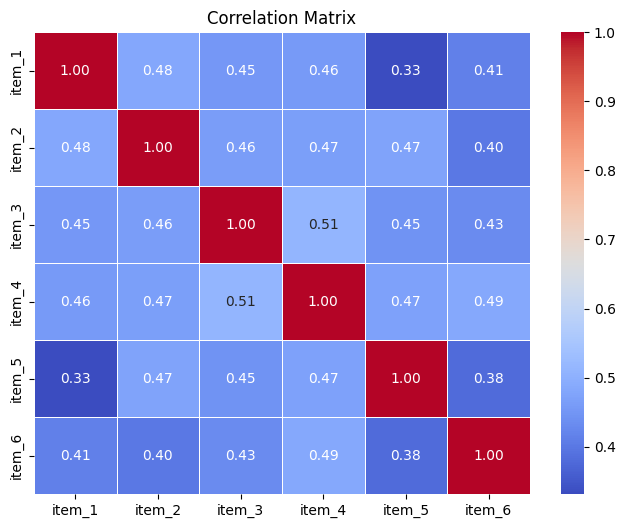

In [ ]:
print(dat2.cov())  # Covariance matrix
print(dat2.corr())  # Correlation matrix

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dat2.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### **Compute the mean response vector**
Try this by yourself before exploring the solution.

In [ ]:
means = dat2.apply(lambda x: x.mean())  # Column-wise mean
print(means)



item_1    1.504005
item_2    1.422903
item_3    1.392156
item_4    1.304696
item_5    1.346359
item_6    1.305712
dtype: float64


#### **Compute the item SDs and Variances**
In this code chunk lets now calculate the SDs and variances **for every item**.
Try using the apply as it was just explained above.

In [ ]:
sds = dat2.apply(lambda x: x.std())  # Column-wise standard deviation
print(sds)
variances = dat2.apply(lambda x: x.var())  # Column-wise variance
print(variances)

item_1    0.359060
item_2    0.368799
item_3    0.392299
item_4    0.407597
item_5    0.376931
item_6    0.383313
dtype: float64
item_1    0.128924
item_2    0.136013
item_3    0.153899
item_4    0.166135
item_5    0.142077
item_6    0.146929
dtype: float64


## 2. Tau Congeneric measurement model
We will now start testing the measurement models that were covered in lecture section of this course two weeks ago.

The **Tau Congeneric** measurement model is the least restrictive one out of the measurement models that we will use today. It assumes that:

* items differ in their difficulty
* items differ in their discrimination power
* items are differently reliable  

We therefore get an estimate for the loading (`Latent Variables` section), for the intercept (`Intecepts` section) and for the errors (`Variances` section) respectively.

### Fit the model
We are now going to define the model using `lavaan` syntax.

In [ ]:
# Put data into R
ro.globalenv['dat2'] = dat2
# Specify the model
ro.r("mtc <- 'eta =~ item_1 + item_2 + item_3 + item_4 + item_5 + item_6'")
# Fit the model
ro.r('fitmtc <- sem(mtc, data=dat2, meanstructure=TRUE, estimator="ML")')
# Print the output of the model for interpretation
summary_fitmtc = ro.r("summary(fitmtc, fit.measures=TRUE, standardized=TRUE)")
print(summary_fitmtc)

lavaan 0.6-19 ended normally after 38 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        18

  Number of observations                           238

Model Test User Model:
                                                      
  Test statistic                                 9.568
  Degrees of freedom                                 9
  P-value (Chi-square)                           0.387

Model Test Baseline Model:

  Test statistic                               435.847
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.999
  Tucker-Lewis Index (TLI)                       0.998

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -432.180
  Loglikelihood unrestricted model (H1)       -4

#### **Model fit**

Before we look at the model parameters, lets first look at the model fit indices (remember them ;) ?).  
The insignificant p-value for the $\chi^2$ test indicates that our model implied correlation matrix doesn't deviate significantly from the data implied correlation matrix, suggesting a good fit. Furthermore, the CFI and TLI are > .95, also indicating a good fit. AIC and BIC can't be interpreted individually but will be later used for comparing models (see below). Lastly, the RMSEA and SRMR are also < .08, also suggesting a good fit. In summary, all indices suggest that the models fits our data well.  
As a reminder - the usual limit value / criteria for the various fit indices:

* $\chi^2$ Test: Insignificance (p-value) suggests good fit, larger $\chi^2$ values (test statistics) indicate worse fit
* CFI & TLI: Values closer to 1 indicate good fit, > .95 desirable
* AIC & BIC: Can't be interpreted individually! Only for model comparison
* RMSEA & SRMR: Smaller values indicate better fit, < .08 desirable

#### **Latent variables section**

Increasing loadings can be interpreted as the respective item having a higher discrimination power.
For example, `item_1` has a loading of 1.098 while `item_4` has a loading of 1.294, meaning that the same increase in the latent variable (i.e. the trait we
measure) results in a larger difference in `item_4` compared to `item_1`. Graphically this is represented by `item_4` having a steeper slope. You might notice that the loading are quite similar across the items, keep this in mind for later.

#### **Intercepts section**

The intercepts can be used to interpret the difficulty of the item. Here, bigger values indicate that an item is **more** difficult. However, watch out: The interpretation can differ in other cases. Here, larger intercepts relate to larger reaction times, meaning, according to the theory, the mood which is assessed with this item is 'less emotionally clear'. On the other hand, if we would like to assess intelligence by the percentage of correct answers in a test, a larger intercept would mean that even individuals with 0 (or average, if centered) intelligence would end up with a large percentage of correct answers, meaning our item is actually to **easy**.
(Technically, you can always say that an item associated with a larger intercept is more difficult. However, the explicit interpretation can differ).

#### **Variances section**

The Variances refer to the reliability of the items. Speaking in a 'CFA-Language', they represent the residuals (errors) associated with the items. In the last row, the variance of the latent variable is shown.

### Try it yourself
Now try fitting a new model excluding item 2 and item 3, how does the fit change? Can you spot any difference between the two models?

In [ ]:
# Remove Items 2 and 3
dat3 = dat2.drop(columns=['item_2', 'item_3'])
print(dat3.head())
# Put data into R
ro.globalenv['dat3'] = dat3
# Specify the model
ro.r("mtc2 <- 'eta =~ item_1 + item_4 + item_5 + item_6'")
# Fit the model
ro.r('fitmtc2 <- sem(mtc2, data=dat3, meanstructure=TRUE, estimator="ML")')
# Print the output of the model for interpretation
summary_fitmtc2 = ro.r("summary(fitmtc2, fit.measures=TRUE, standardized=TRUE)")
print(summary_fitmtc2)

     item_1    item_4    item_5    item_6
0  1.463255  1.568408  1.457452  1.628260
1  1.689358  1.696533  1.395997  1.842294
2  1.300736  1.178347  1.784903  1.221125
3  1.588419  1.278152  1.145496  1.446213
4  1.182953  1.357895  0.875052  1.232852
lavaan 0.6-19 ended normally after 32 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        12

  Number of observations                           238

Model Test User Model:
                                                      
  Test statistic                                 1.089
  Degrees of freedom                                 2
  P-value (Chi-square)                           0.580

Model Test Baseline Model:

  Test statistic                               206.009
  Degrees of freedom                                 6
  P-value                                        0.000

User Model versus Baseline Model:

  C

## 3. Essentially tau-equivalent model

The **Essentially tau-equivalent** measurement model is also quite flexible but it has one more restriction compared to the **Tau Congeneric** measurement model. It assumes that

* items differ in their difficulty
* items **are equivalent in their discrimination power**
* items are differently reliable  

We therefore get an estimate for the intercepts (`Intecepts` section) and for the errors (`Variances` section). Note that we also get a `Latent Variables` section again, however, you will have to fix all the loadings to 1.

### Fit the model

In [ ]:
# Specify the model
ro.r("mete <<-'eta=~ item_1 + 1*item_2 + 1*item_3 + 1*item_4 + 1*item_5 + 1*item_6'")
# Fit the model
ro.r('fitmete <- sem(mete, data=dat2, meanstructure=TRUE, estimator="ML")')
# Print the output of the model for interpretation
summary_fitmete = ro.r("summary(fitmete, fit.measures=TRUE, standardized=TRUE)")
print(summary_fitmete)

lavaan 0.6-19 ended normally after 12 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        13

  Number of observations                           238

Model Test User Model:
                                                      
  Test statistic                                16.949
  Degrees of freedom                                14
  P-value (Chi-square)                           0.259

Model Test Baseline Model:

  Test statistic                               435.847
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.993
  Tucker-Lewis Index (TLI)                       0.992

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -435.870
  Loglikelihood unrestricted model (H1)       -4

You can see that the output looks very similar to the one from the **Tau Congeneric** measurement model. The interpretation of the intercepts (`Intecepts` section) and for the errors (`Variances` section) is the same as before. The only difference is that the loadings (`Latent Variables` section) are all fixed to one, meaning that we assume that all items have the same discriminatory power. Graphically speaking, this means that the slopes of the items are equivalent. The interpretation of the fit indices is analogous to the **Tau Congeneric** measurement model (see above).

### Compare model fit

Next, lets compare the models we just fitted.

In [ ]:
# Perform anova and print indexes
anova_mete_mtc = ro.r("anova(fitmete, fitmtc)")
lavTestLRT_mete_mtc = ro.r("lavTestLRT(fitmete, fitmtc)")
print(anova_mete_mtc)
print(lavTestLRT_mete_mtc)


Chi-Squared Difference Test

        Df    AIC    BIC   Chisq Chisq diff    RMSEA Df diff Pr(>Chisq)
fitmtc   9 900.36 962.86  9.5683                                       
fitmete 14 897.74 942.88 16.9488     7.3805 0.044726       5     0.1938


Chi-Squared Difference Test

        Df    AIC    BIC   Chisq Chisq diff    RMSEA Df diff Pr(>Chisq)
fitmtc   9 900.36 962.86  9.5683                                       
fitmete 14 897.74 942.88 16.9488     7.3805 0.044726       5     0.1938



According to the BIC and AIC the more restricted **Essentially tau-equivalent** model has a better model fit compared to the **Tau Congeneric** measurement model (as lower values for AIC and BIC indicate better model fit). The $\chi^2$ Test however suggests that there are no significant differences in model fit as indicated by p > .05. This result is not too surprising as we already saw quite similar loading estimates across items in the **Tau Congeneric** measurement model (see above). Therefore, restricting the loadings to equivalence isn't too much of a deviation from the **Tau Congeneric** measurement model (which does not restrict the loadings), resulting in a insignificant difference in model fit.

## 4. Tau-equivalent model

The **Tau-equivalent** measurement model has one more restriction compared to the **Essentially tau-equivalent** model. It assumes that

* items **are equivalent in their difficulty**
* items **are equivalent in their discrimination power**
* items are differently reliable  

We therefore only get an estimate for the errors (`Variances` section). Note that we also get a `Latent Variables` section and
a `Intecepts` section again, however, you can see that all the loadings and intercepts are fixed.

### Fit the model and a quick rpy2 hint

Using `rpy2` to Define Multi-Line Lavaan Models in R  

When working with `rpy2` in Python to execute R commands, multi-line strings must be formatted correctly. R's **lavaan** package requires structured model definitions, but Python's `rpy2` only accepts single-line strings. To maintain readability and correctness, **`\n`** is used to preserve line breaks.

### **Example: Defining a Latent Variable Model in R**  

```python
ro.r("mte <<- 'eta =~ item_1 + 1*item_2 + 1*item_3 + 1*item_4 + 1*item_5 + 1*item_6\n"
      "item_1 ~ a*1\n"
      "item_2 ~ a*1\n"
      "item_3 ~ a*1\n"
      "item_4 ~ a*1\n"
      "item_5 ~ a*1\n"
      "item_6 ~ a*1'")


In [ ]:
# Specify the model
ro.r("mte <<- 'eta =~ item_1 + 1*item_2 + 1*item_3 + 1*item_4 + 1*item_5 + 1*item_6\n"
      "item_1 ~ a*1\n"
      "item_2 ~ a*1\n"
      "item_3 ~ a*1\n"
      "item_4 ~ a*1\n"
      "item_5 ~ a*1\n"
      "item_6 ~ a*1'")

# Fit the model
ro.r('fitmte <- sem(mte, data=dat2, meanstructure=TRUE, estimator="ML")')
# Print the output of the model for interpretation
summary_fitmte = ro.r("summary(fitmte, fit.measures=TRUE, standardized=TRUE)")
print(summary_fitmte)


lavaan 0.6-19 ended normally after 13 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        13
  Number of equality constraints                     5

  Number of observations                           238

Model Test User Model:
                                                      
  Test statistic                               100.116
  Degrees of freedom                                19
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               435.847
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.807
  Tucker-Lewis Index (TLI)                       0.848

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -4

Again, the output looks very similar to the previous ones. The interpretation also is equivalent to before. The only difference is that the loadings (`Latent Variables` section) and the intercept (`Intercepts` section) are fixed, meaning that we assume that all items have the same discriminatory power and the same difficulty. Graphically speaking, this means that the slopes and the intercepts of the items are equivalent. The interpretation of the fit indices is analogous to the **Tau Congeneric** measurement model (see above).

### Compare model fit

As before, we can use the `anova()` function to compare the model fits.

In [ ]:
# Perform anova and print indexes
anova_mete_mte = ro.r("anova(fitmete, fitmte)")
print(anova_mete_mte)


Chi-Squared Difference Test

        Df    AIC    BIC   Chisq Chisq diff   RMSEA Df diff Pr(>Chisq)    
fitmete 14 897.74 942.88  16.949                                          
fitmte  19 970.91 998.69 100.116     83.168 0.25629       5  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In this comparison, the more restricted Tau-equivalent model has significantly worse fit compared to the Essentially tau-equivalent model as indicated by the significant differences in $\chi^2$. Also AIC and BIC favor the more flexible model.

## 5. Essentially tau-parallel measurement model

The **Essentially tau-parallel** measurement model looses one restriction compared to the Tau-equivalent model by letting the intercepts vary. However, it restricts the items to have equivalent reliability. It assumes that

* items **differ in their difficulty**
* items are equivalent in their discrimination power
* items are **equivalently reliable**  

We therefore only get estimates for the difficulty of the items (`Intercepts` section). Discrimination power (`Latent variables` section) and Reliability (`Variances` section) are fixed across items.

### Fit the model

In [ ]:
# Specify the model
ro.r("metp <<- 'eta =~ item_1 + 1*item_2 + 1*item_3 + 1*item_4 + 1*item_5 + 1*item_6\n"
      "item_1 ~~ b*item_1\n"
      "item_2 ~~ b*item_2\n"
      "item_3 ~~ b*item_3\n"
      "item_4 ~~ b*item_4\n"
      "item_5 ~~ b*item_5\n"
      "item_6 ~~ b*item_6'")

# Fit the model
ro.r('fitmetp <- sem(metp, data=dat2, meanstructure=TRUE, estimator="ML")')
# Print the output of the model for interpretation
summary_fitmetp = ro.r("summary(fitmetp, fit.measures=TRUE, standardized=TRUE)")
print(summary_fitmetp)



lavaan 0.6-19 ended normally after 13 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        13
  Number of equality constraints                     5

  Number of observations                           238

Model Test User Model:
                                                      
  Test statistic                                19.886
  Degrees of freedom                                19
  P-value (Chi-square)                           0.401

Model Test Baseline Model:

  Test statistic                               435.847
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.998
  Tucker-Lewis Index (TLI)                       0.998

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -4

In the output we see fixed parameters in the `Latent variables` section and in the `Variances` section. However, intercepts (i.e. item difficulties) are allowed to vary) as you can see in the `Intercepts` section. `item_1` has the highest difficulty (1.504) and `item_4`has the lowest difficulty (1.305). This means that an individual with a score of 0 for the latent variable (here: **emotional clarity**) (or a mean score if the latent variable is centered) scores the lowest on `item_4` and highest on `item_1`. The interpretation of the fit indices is analogous to the **Tau Congeneric** measurement model (see above).

### Compare model fit

As before, we can use the `anova()` function to compare the model fits.

In [ ]:
# Perform anova and print indexes
anova_mete_mept = ro.r("anova(fitmete, fitmetp)")
print(anova_mete_mept)


Chi-Squared Difference Test

        Df    AIC    BIC  Chisq Chisq diff RMSEA Df diff Pr(>Chisq)
fitmete 14 897.74 942.88 16.949                                    
fitmetp 19 890.68 918.46 19.886     2.9369     0       5     0.7097



Note that we compare the **Essentially tau-parallel** measurement model with the **Essentially tau-equivalent** model (**not** the Essentially tau-parallel measurement model with the **Tau-equivalent** model). The latter isn't possible as we can only compare models that results from each other by adding (or loosening) restrictions. In the **Essentially tau-parallel** measurement model we restrict discrimination power and reliability. In the **Tau-equivalent** model we also restrict discrimination power but further restrict the item difficulty to be equivalent across items. This means neither of the models results from the other one by adding (or loosening) a restriction but rather by dropping one restriction and adding another one. Such models can't be compared. On the other hand, the  **Essentially tau-parallel** measurement model results from the **Essentially tau-equivalent** model by adding the restriction of equivalent reliability. Thus, these models can be compared.  

The comparison however yields in an ambiguous result. While AIC and BIC favor the **Essentially tau-parallel** measurement model, the $\chi^2$ value suggests a better fit for the **Essentially tau-equivalent** model. However, the $\chi^2$ values do not differ significantly (p > .05).   

## 6. Tau-parallel measurement model

Out of the models we looked at today, the **Tau-parallel** measurement model is the most restrictive one. It assumes that

* items **are equivalent in their difficulty**
* items **are equivalent in their discrimination power**
* items are **equivalently reliable**  

Therefore, all parameters (`Intercepts` section, `Latent variables` section and `Variances` section) are restricted.

### Fit the model

In [ ]:
# Specify the model
ro.r("mtp <<- 'eta =~ item_1 + 1*item_2 + 1*item_3 + 1*item_4 + 1*item_5 + 1*item_6\n"
      "item_1 ~ a*1\n"
      "item_2 ~ a*1\n"
      "item_3 ~ a*1\n"
      "item_4 ~ a*1\n"
      "item_5 ~ a*1\n"
      "item_6 ~ a*1\n"
      "item_1 ~~ b*item_1\n"
      "item_2 ~~ b*item_2\n"
      "item_3 ~~ b*item_3\n"
      "item_4 ~~ b*item_4\n"
      "item_5 ~~ b*item_5\n"
      "item_6 ~~ b*item_6'")
# Fit the model
ro.r('fitmtp <- sem(mtp, data=dat2, meanstructure=TRUE, estimator="ML")')
# Print the output of the model for interpretation
summary_fitmtp = ro.r("summary(fitmtp, fit.measures=TRUE, standardized=TRUE)")
print(summary_fitmtp)


lavaan 0.6-19 ended normally after 13 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        13
  Number of equality constraints                    10

  Number of observations                           238

Model Test User Model:
                                                      
  Test statistic                               104.462
  Degrees of freedom                                24
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               435.847
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.809
  Tucker-Lewis Index (TLI)                       0.881

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -4

As you can see, loadings, intercepts and errors are restricted. The interpretation of the fit indices is analogous to the **Tau Congeneric** measurement model (see above). You might notice that the model fit (as indicated by the $\chi^2$ value) declines with more restrictions being added to the models. While the (least restrictive) Tau Congeneric measurement model has a $\chi^2$ value of 9.568, the (most restrictive) Tau-parallel measurement model has a $\chi^2$ value of 104.462.

### Compare model fit

Since the **Tau-parallel** measurement model results from further restricting the **Essentially tau-parallel** measurement model OR from further restricting the **Tau-equivalent** model we can test the **Tau-parallel** measurement model against both models.


In [ ]:
# Perform anova and print indexes
anova_metp_mtp = ro.r("anova(fitmetp, fitmtp)") #Tau-parallel measurement model vs. Essentially tau-parallel measurement model
print(anova_metp_mtp)

anova_mte_mtp = ro.r("anova(fitmte, fitmtp)") #Tau-parallel measurement model vs. Tau-equivalent measurement model
print(anova_mte_mtp)


Chi-Squared Difference Test

        Df    AIC    BIC   Chisq Chisq diff   RMSEA Df diff Pr(>Chisq)    
fitmetp 19 890.68 918.46  19.886                                          
fitmtp  24 965.25 975.67 104.462     84.576 0.25859       5  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Chi-Squared Difference Test

       Df    AIC    BIC  Chisq Chisq diff RMSEA Df diff Pr(>Chisq)
fitmte 19 970.91 998.69 100.12                                    
fitmtp 24 965.25 975.67 104.46     4.3457     0       5     0.5008



The first comparison suggests that the **Essentially tau-parallel** measurement model provides a significantly better fit to the data as compared to the Tau-parallel measurement model as indicated by $\chi^2$, AIC and BIC.
Further, we see that there seems to be no significant different in model fit between the **Tau-parallel** measurement model and the **Tau-equivalent** model, although AIC and BIC slightly favor the Tau-parallel measurement model. This advantage in model fit is however not due to the model providing a better fit to the data but rather due to the **Tau-parallel** measurement model having less parameters to be estimated (i.e. it is a simpler model).

## 7. And now?

One might ask what we should conclude / infer from these models.  
Lets look again at the last comparisons.

In [ ]:
anova_metp_mtp = ro.r("anova(fitmetp, fitmtp)") #Tau-parallel measurement model vs. Essentially tau-parallel measurement model
print(anova_metp_mtp)


Chi-Squared Difference Test

        Df    AIC    BIC   Chisq Chisq diff   RMSEA Df diff Pr(>Chisq)    
fitmetp 19 890.68 918.46  19.886                                          
fitmtp  24 965.25 975.67 104.462     84.576 0.25859       5  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



You should remember that the **Tau-parallel** measurement model restricts **discrimination power** (loadings), **difficulty** (intercepts) and **reliability** (errors). The **Essentially tau-parallel measurement model** only restricts **discrimination power** and **reliability**. We see in the model comparison that the Essentially tau-parallel measurement model provides a significantly better fit to the data. From this we can infer that freely estimating the intercepts provides a significantly better fit as compared to assuming them to be equivalent. In other words, the data suggests that our items are **not equally difficult**.

In [ ]:
anova_mte_mtp = ro.r("anova(fitmte, fitmtp)") #Tau-parallel measurement model vs. Tau-equivalent measurement model
print(anova_mte_mtp)



Chi-Squared Difference Test

       Df    AIC    BIC  Chisq Chisq diff RMSEA Df diff Pr(>Chisq)
fitmte 19 970.91 998.69 100.12                                    
fitmtp 24 965.25 975.67 104.46     4.3457     0       5     0.5008



Lets look at the other comparison. Again, you should remember that the **Tau-parallel measurement model** restricts **discrimination power** (loadings), **difficulty** (intercepts) and **reliability** (errors). The **Tau-equivalent measurement model** only restricts **discrimination power** and **difficulty**. The model comparison shows that the more flexible model (Tau-equivalent measurement model) does **not** provide a significantly better fit to the data, meaning there is no significant differences in model fit when we freely estimate the reliability as compared to assuming equal reliability across all items.   
Think of it like that: When the more flexible model gives equal reliability scores (errors) for all items, restricting them in a less flexible model does not change a lot, hence there are no significant differences in model fit. In other words, from this comparison we can conclude that our items are **equally reliable**.  

According to this approach, would you say our items are equal in discrimination power?

## 8. Extract factor scores

Lastly, we can also extract person coefficients (i.e. factor scores) using the `predict` function.

In [ ]:
ppar = ro.r("predict(fitmtc)")
print(ppar)

[[ 0.12073671]
 [ 0.2399859 ]
 [-0.00106554]
 [-0.0080816 ]
 [-0.20787835]
 [-0.18320165]
 [ 0.39365629]
 [ 0.27002988]
 [-0.0353721 ]
 [-0.11238712]
 [-0.03732313]
 [ 0.27998964]
 [-0.08850881]
 [ 0.09130247]
 [-0.10579118]
 [ 0.11052924]
 [ 0.10778979]
 [-0.32484031]
 [ 0.20636155]
 [ 0.17023445]
 [ 0.26021663]
 [ 0.27197654]
 [-0.17114061]
 [-0.1423634 ]
 [ 0.36606071]
 [-0.07478522]
 [-0.08269706]
 [ 0.06433197]
 [ 0.15894493]
 [ 0.04430302]
 [-0.50563021]
 [ 0.02755227]
 [ 0.0045081 ]
 [ 0.05691382]
 [ 0.06471399]
 [ 0.11226692]
 [ 0.01009598]
 [ 0.03662523]
 [ 0.0371341 ]
 [-0.07487552]
 [ 0.06196375]
 [-0.08277975]
 [ 0.11805626]
 [ 0.16415042]
 [-0.14367311]
 [ 0.02914086]
 [ 0.12025572]
 [ 0.11489691]
 [-0.21777332]
 [ 0.15941502]
 [ 0.22347693]
 [ 0.06400319]
 [ 0.01480666]
 [-0.06774294]
 [ 0.37054273]
 [ 0.06061693]
 [ 0.2043271 ]
 [-0.21180907]
 [ 0.02470239]
 [ 0.22176066]
 [-0.20330248]
 [ 0.04473016]
 [ 0.0934721 ]
 [-0.23556783]
 [ 0.01584813]
 [ 0.2483084 ]
 [-0.38746